In [1]:
import matplotlib.pyplot as plt
import numpy as np

release_dir = "./cmake-build-release/"
padding_dir = "./cmake-build-padding/"
out_dir = "results_old/"

sequential_name = "sequential"
parallel_AOS = "parallel_AOS"
parallel_AOS_simd = "parallel_AOS_simd"
parallel_AOS_simd_manual = "parallel_AOS_simd_manual"
parallel_SOA = "parallel_SOA"
parallel_SOA_simd = "parallel_SOA_simd"
parallel_SOA_simd_manual = "parallel_SOA_simd_manual"

iterations = 6

In [2]:
def scrape_data(dir_path):
    series = np.empty(0)
    for i in range(1, iterations):
        file = open(dir_path + f"/{i}.txt")
        data = file.read().split(",")
        data.pop(-1)
        series = np.concat((series, data))
        file.close()
    return series.astype(float)

def print_stats(array):
    print(f"Mean:{np.mean(array)}")
    print(f"Max:{np.max(array)}")
    print(f"Min:{np.min(array)}")
    print(f"Std:{np.std(array)}")

## SpeedUp for Increasing Threads

In [3]:
sequential_serie = np.empty(0, dtype = float)
parallel_AOS_series = []
parallel_AOS_simd_series = []
parallel_AOS_simd_manual_series = []
parallel_SOA_series = []
parallel_SOA_simd_series = []
parallel_SOA_simd_manual_series = []

parallel_AOS_series_p = []
parallel_AOS_simd_series_p = []
parallel_AOS_simd_manual_series_p = []

sequential_series = scrape_data(out_dir + sequential_name)
sequential_series_p = (scrape_data(out_dir + sequential_name + "_padding"))

In [4]:
print_stats(sequential_series)

Mean:0.06384309128630705
Max:0.073142
Min:0.05748
Std:0.0045515914350854735


In [5]:
threads = range(1,11)
for t in threads:
    parallel_AOS_series.append(scrape_data(out_dir + parallel_AOS + f"_{t}"))
    parallel_AOS_simd_series.append(scrape_data(out_dir + parallel_AOS_simd + f"_{t}"))
    parallel_AOS_simd_manual_series.append(scrape_data(out_dir + parallel_AOS_simd_manual + f"_{t}"))
    parallel_SOA_series.append(scrape_data(out_dir + parallel_SOA + f"_{t}"))
    parallel_SOA_simd_series.append(scrape_data(out_dir + parallel_SOA_simd + f"_{t}"))
    parallel_SOA_simd_manual_series.append(scrape_data(out_dir + parallel_SOA_simd_manual + f"_{t}"))

    parallel_AOS_series_p.append(scrape_data(out_dir + parallel_AOS + f"_padding_{t}"))
    parallel_AOS_simd_series_p.append(scrape_data(out_dir + parallel_AOS_simd + f"_padding_{t}"))
    parallel_AOS_simd_manual_series_p.append(scrape_data(out_dir + parallel_AOS_simd_manual + f"_padding_{t}"))

In [6]:
print_stats(parallel_AOS_series[7])

Mean:0.015027792289988491
Max:0.032445
Min:0.013952
Std:0.0013617843942740392


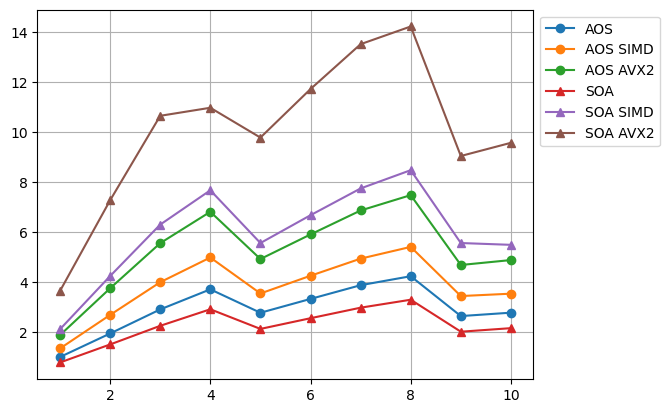

In [7]:
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_AOS_series[i]) for i in range(len(threads))], label = "AOS", marker = "o")
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_AOS_simd_series[i]) for i in range(len(threads))], label = "AOS SIMD", marker = "o")
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_AOS_simd_manual_series[i]) for i in range(len(threads))], label = "AOS AVX2", marker = "o")
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_SOA_series[i]) for i in range(len(threads))], label = "SOA", marker = "^")
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_SOA_simd_series[i]) for i in range(len(threads))], label = "SOA SIMD", marker = "^")
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_SOA_simd_manual_series[i]) for i in range(len(threads))], label = "SOA AVX2", marker = "^")

plt.legend(bbox_to_anchor=(1, 1))
plt.grid()

## Confronting Padding

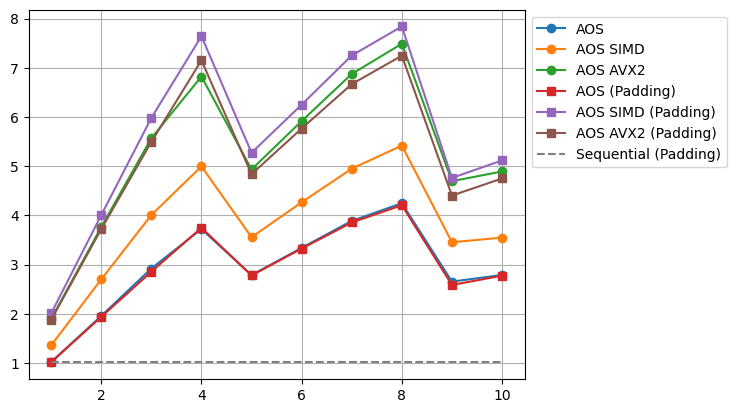

In [8]:
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_AOS_series[i]) for i in range(len(threads))], label = "AOS", marker = "o")
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_AOS_simd_series[i]) for i in range(len(threads))], label = "AOS SIMD", marker = "o")
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_AOS_simd_manual_series[i]) for i in range(len(threads))], label = "AOS AVX2", marker = "o")

plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_AOS_series_p[i]) for i in range(len(threads))], label = "AOS (Padding)", marker = "s")
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_AOS_simd_series_p[i]) for i in range(len(threads))], label = "AOS SIMD (Padding)", marker = "s")
plt.plot(threads, [np.mean(sequential_series) / np.mean(parallel_AOS_simd_manual_series_p[i]) for i in range(len(threads))], label = "AOS AVX2 (Padding)", marker = "s")

plt.hlines(np.mean(sequential_series) / np.mean(sequential_series_p), min(threads), max(threads), color = "grey", ls = "--", label = "Sequential (Padding)")

plt.legend(bbox_to_anchor=(1, 1))
plt.grid()

## SpeedUp for increasing Load

In [9]:
sequential_series = []
parallel_AOS_series = []
parallel_AOS_simd_series = []
parallel_AOS_simd_manual_series = []
parallel_SOA_series = []
parallel_SOA_simd_series = []
parallel_SOA_simd_manual_series = []

parallel_AOS_series_p = []
parallel_AOS_simd_series_p = []
parallel_AOS_simd_manual_series_p = []

In [10]:
loads = range(1000,15001,1000)
for l in loads:
    sequential_series.append(scrape_data(out_dir + sequential_name + f"_load{l}"))
    parallel_AOS_series.append(scrape_data(out_dir + parallel_AOS + f"_load{l}"))
    parallel_AOS_simd_series.append(scrape_data(out_dir + parallel_AOS_simd + f"_load{l}"))
    parallel_AOS_simd_manual_series.append(scrape_data(out_dir + parallel_AOS_simd_manual + f"_load{l}"))
    parallel_SOA_series.append(scrape_data(out_dir + parallel_SOA + f"_load{l}"))
    parallel_SOA_simd_series.append(scrape_data(out_dir + parallel_SOA_simd + f"_load{l}"))
    parallel_SOA_simd_manual_series.append(scrape_data(out_dir + parallel_SOA_simd_manual + f"_load{l}"))
    
    parallel_AOS_series_p.append(scrape_data(out_dir + parallel_AOS + f"_padding_load{l}"))
    parallel_AOS_simd_series_p.append(scrape_data(out_dir + parallel_AOS_simd + f"_padding_load{l}"))
    parallel_AOS_simd_manual_series_p.append(scrape_data(out_dir + parallel_AOS_simd_manual + f"_padding_load{l}"))

In [11]:
print_stats(sequential_series[7])
print_stats(parallel_AOS_series[7])

Mean:0.15139359365079363
Max:0.162307
Min:0.146945
Std:0.003411041892678904
Mean:0.03710284014002334
Max:0.069294
Min:0.035633
Std:0.0022456667000626657


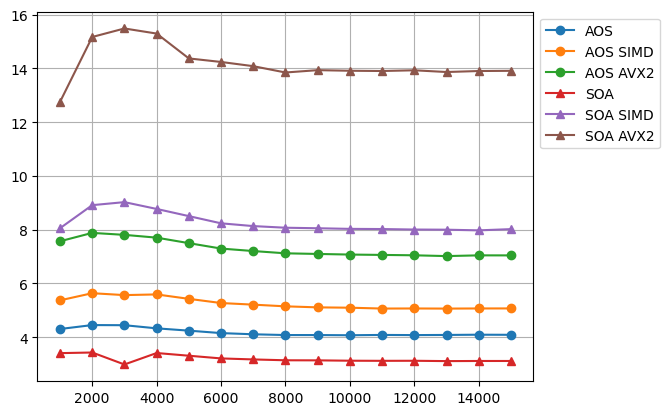

In [12]:
plt.plot(loads, [np.mean(sequential_series[i]) / np.mean(parallel_AOS_series[i]) for i in range(len(loads))], label = "AOS", marker = "o")
plt.plot(loads, [np.mean(sequential_series[i]) / np.mean(parallel_AOS_simd_series[i]) for i in range(len(loads))], label = "AOS SIMD", marker = "o")
plt.plot(loads, [np.mean(sequential_series[i]) / np.mean(parallel_AOS_simd_manual_series[i]) for i in range(len(loads))], label = "AOS AVX2", marker = "o")
plt.plot(loads, [np.mean(sequential_series[i]) / np.mean(parallel_SOA_series[i]) for i in range(len(loads))], label = "SOA", marker = "^")
plt.plot(loads, [np.mean(sequential_series[i]) / np.mean(parallel_SOA_simd_series[i]) for i in range(len(loads))], label = "SOA SIMD", marker = "^")
plt.plot(loads, [np.mean(sequential_series[i]) / np.mean(parallel_SOA_simd_manual_series[i]) for i in range(len(loads))], label = "SOA AVX2", marker = "^")

plt.legend(bbox_to_anchor=(1, 1))
plt.grid()

## Confronting Padding

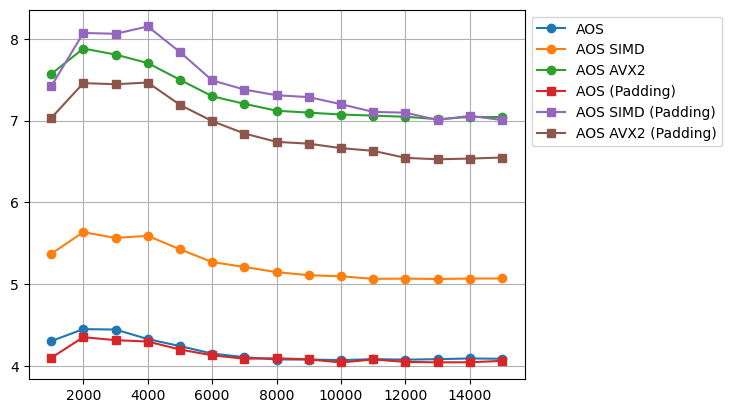

In [13]:
plt.plot(loads, [np.mean(sequential_series[i]) / np.mean(parallel_AOS_series[i]) for i in range(len(loads))], label = "AOS", marker = "o")
plt.plot(loads, [np.mean(sequential_series[i]) / np.mean(parallel_AOS_simd_series[i]) for i in range(len(loads))], label = "AOS SIMD", marker = "o")
plt.plot(loads, [np.mean(sequential_series[i]) / np.mean(parallel_AOS_simd_manual_series[i]) for i in range(len(loads))], label = "AOS AVX2", marker = "o")

plt.plot(loads, [np.mean(sequential_series[i]) / np.mean(parallel_AOS_series_p[i]) for i in range(len(loads))], label = "AOS (Padding)", marker = "s")
plt.plot(loads, [np.mean(sequential_series[i]) / np.mean(parallel_AOS_simd_series_p[i]) for i in range(len(loads))], label = "AOS SIMD (Padding)", marker = "s")
plt.plot(loads, [np.mean(sequential_series[i]) / np.mean(parallel_AOS_simd_manual_series_p[i]) for i in range(len(loads))], label = "AOS AVX2 (Padding)", marker = "s")

plt.legend(bbox_to_anchor=(1, 1))
plt.grid()

## Triyng varius Dynamic Scheduling Chuncks

In [14]:
sequential_series = []
parallel_AOS_series = []
parallel_AOS_simd_series = []
parallel_AOS_simd_manual_series = []
parallel_SOA_series = []
parallel_SOA_simd_series = []
parallel_SOA_simd_manual_series = []

parallel_AOS_series_p = []
parallel_AOS_simd_series_p = []
parallel_AOS_simd_manual_series_p = []

In [15]:
chunks = [1, 4, 10, 25, 50, 100, 200, 300, 400, 500, 625]
sequential_series.append(scrape_data(out_dir + sequential_name))

for c in chunks:
    parallel_AOS_series.append(scrape_data(out_dir + parallel_AOS + f"_dynamic{c}"))
    parallel_AOS_simd_series.append(scrape_data(out_dir + parallel_AOS_simd + f"_dynamic{c}"))
    parallel_AOS_simd_manual_series.append(scrape_data(out_dir + parallel_AOS_simd_manual + f"_dynamic{c}"))
    parallel_SOA_series.append(scrape_data(out_dir + parallel_SOA + f"_dynamic{c}"))
    parallel_SOA_simd_series.append(scrape_data(out_dir + parallel_SOA_simd + f"_dynamic{c}"))
    parallel_SOA_simd_manual_series.append(scrape_data(out_dir + parallel_SOA_simd_manual + f"_dynamic{c}"))
    
#    parallel_AOS_series_p.append(scrape_data(out_dir + parallel_AOS + f"_padding_load{l}"))
#    parallel_AOS_simd_series_p.append(scrape_data(out_dir + parallel_AOS_simd + f"_padding_load{l}"))
#    parallel_AOS_simd_manual_series_p.append(scrape_data(out_dir + parallel_AOS_simd_manual + f"_padding_load{l}"))

In [16]:
print_stats(sequential_series)
print_stats(parallel_AOS_series[7])

Mean:0.06384309128630705
Max:0.073142
Min:0.05748
Std:0.0045515914350854735
Mean:0.016805926904176906
Max:0.036622
Min:0.015543
Std:0.0012549409102208535


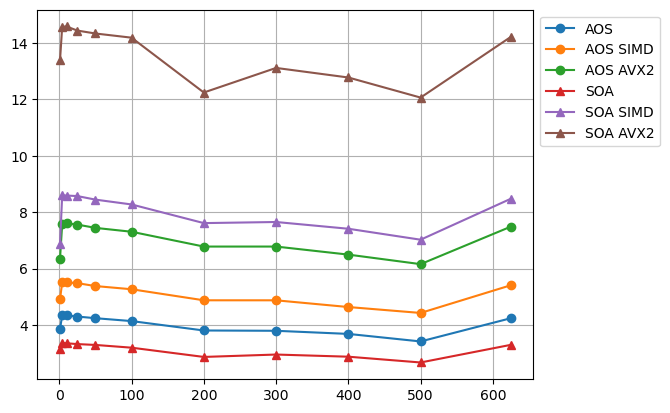

In [17]:
plt.plot(chunks, [np.mean(sequential_series) / np.mean(parallel_AOS_series[i]) for i in range(len(chunks))], label = "AOS", marker = "o")
plt.plot(chunks, [np.mean(sequential_series) / np.mean(parallel_AOS_simd_series[i]) for i in range(len(chunks))], label = "AOS SIMD", marker = "o")
plt.plot(chunks, [np.mean(sequential_series) / np.mean(parallel_AOS_simd_manual_series[i]) for i in range(len(chunks))], label = "AOS AVX2", marker = "o")
plt.plot(chunks, [np.mean(sequential_series) / np.mean(parallel_SOA_series[i]) for i in range(len(chunks))], label = "SOA", marker = "^")
plt.plot(chunks, [np.mean(sequential_series) / np.mean(parallel_SOA_simd_series[i]) for i in range(len(chunks))], label = "SOA SIMD", marker = "^")
plt.plot(chunks, [np.mean(sequential_series) / np.mean(parallel_SOA_simd_manual_series[i]) for i in range(len(chunks))], label = "SOA AVX2", marker = "^")

plt.legend(bbox_to_anchor=(1, 1))
plt.grid()

In [22]:
data_seq = np.array([0.170409,0.160732,0.159983,0.158040,0.158537,0.157444,0.158162,0.157679,0.158771,0.161270,0.160196,0.160016,0.157834,0.157267,0.157942,0.158675,0.163176,0.168608,0.167066,0.164824,0.160377,0.159800,0.160056,0.161891,0.160532,0.164354,0.162165,0.163312,0.163086,0.161964,0.163706,0.162907,0.162099,0.161238,0.161925,0.161303,0.163126,0.163172,0.165831,0.164767,0.162806,0.162748,0.164447,0.165163,0.165594,0.162535,0.168310,0.169435,0.166401,0.165526,0.168809,0.166691,0.165448,0.169796,0.187897,0.192647,0.198375,0.168892,0.169572,0.172750,0.170123])
data_par = np.array([0.096780,0.070873,0.078716,0.085416,0.087093,0.083582,0.084499,0.082993,0.081256,0.100711,0.070419,0.057845,0.073067,0.085816,0.080034,0.059628,0.061089,0.059583,0.058417,0.057722,0.057707,0.058152,0.059308,0.064707,0.058041,0.057662,0.058657,0.057937,0.061207,0.062007,0.063515,0.060184,0.063142,0.059587,0.062654,0.062363,0.062402,0.061219,0.059427,0.063178,0.061295,0.057975,0.062760,0.057334,0.061201,0.057966,0.068515,0.058433,0.058313,0.059209,0.058735,0.058269,0.058288,0.058757,0.058105,0.059508,0.064669,0.062783,0.058796,0.059273,0.059576,0.063955,0.064762,0.060259,0.078640,0.080816,0.068932,0.060321,0.063520,0.063317,0.061622,0.056282,0.056598,0.065572,0.058311,0.071279,0.060943,0.062024,0.061055,0.059602,0.062311,0.057562,0.059707,0.058811,0.061475,0.057200,0.057825,0.056129,0.083522,0.069629,0.056523,0.056076,0.059696,0.061896,0.061494,0.065766,0.061188,0.063779,0.060453,0.058126,0.063279,0.059932,0.064007,0.067313,0.085823,0.059398,0.063233,0.059156,0.064722,0.059962,0.071647,0.060899,0.061886,0.059492,0.062896,0.064593,0.072843,0.067731,0.064167,0.062009,0.064593,0.063469,0.073428,0.057315,0.064756,0.080453,0.057333,0.058000,0.059083,0.061598,0.065328,0.058041,0.062933,0.062341,0.062478,0.063443,0.065533,0.065230,0.064110,0.065086,0.065955,0.083214,0.060014,0.065304,0.068433,0.063789,0.062093,0.060433,0.060714,0.063010,0.060052,0.073259,0.061177,0.060519])
data_simd = np.array([0.085277,0.061058,0.061445,0.057418,0.055275,0.054277,0.050873,0.053596,0.049127,0.047782,0.049107,0.050077,0.053292,0.049606,0.052660,0.052457,0.052101,0.049234,0.048278,0.048198,0.053586,0.053379,0.050508,0.049173,0.048989,0.054274,0.050979,0.052785,0.048781,0.051921,0.050608,0.050134,0.052705,0.050701,0.050258,0.053616,0.052910,0.056996,0.052577,0.052519,0.050271,0.049952,0.051642,0.051509,0.051636,0.057116,0.055873,0.052301,0.053016,0.057242,0.054877,0.050792,0.049815,0.049361,0.048456,0.051720,0.051114,0.054159,0.053768,0.054883,0.055905,0.056653,0.052053,0.060200,0.057940,0.051789,0.052981,0.051213,0.055404,0.050567,0.052782,0.050849,0.053444,0.052670,0.054587,0.053178,0.055460,0.052238,0.050460,0.051414,0.049909,0.050260,0.050358,0.052563,0.054007,0.052834,0.049680,0.048971,0.054873,0.050366,0.056163,0.057210,0.052571,0.055247,0.056143,0.050294,0.051850,0.054001,0.054124,0.056127,0.051920,0.051494,0.051950,0.051540,0.050835,0.051692,0.052564,0.057079,0.050082,0.049981,0.048290,0.048961,0.048589,0.049193,0.050720,0.051665,0.052384,0.053884,0.052078,0.052779,0.054340,0.051441,0.051389,0.053836,0.053497,0.050885,0.050690,0.050889,0.059741,0.074859,0.057762,0.047506,0.051068,0.052160,0.052032,0.053182,0.048400,0.049270,0.048861,0.047597,0.046392,0.047526,0.053878,0.048411,0.074023,0.049600,0.049396,0.052993,0.049103,0.053674,0.048685,0.053756,0.050832,0.048096,0.054066,0.048453,0.053832,0.047563,0.052905,0.053670,0.048468,0.050304,0.049402,0.047960,0.048996,0.047819,0.047607,0.047361,0.047847,0.051493,0.051301,0.048081,0.047839,0.046687,0.049214,0.048277,0.048156,0.053177,0.054042,0.050386,0.049545,0.052131,0.053296,0.051599,0.051749,0.052103,0.048852,0.051729,0.051861,0.049299])
data_old = np.array([0.054843,0.057078,0.051343,0.059746,0.056734,0.056747,0.058912,0.053021,0.051109,0.057745,0.055743,0.058979,0.057966,0.050396,0.056383,0.048560,0.058789,0.056803,0.052941,0.059929,0.052306,0.050665,0.054545,0.055458,0.058095,0.050154,0.063908,0.063397,0.058550,0.083112,0.060126,0.057573,0.063585,0.054669,0.059283,0.062004,0.066828,0.058945,0.060093,0.061707,0.052218,0.050206,0.060715,0.059979,0.051548,0.059925,0.055132,0.058265,0.057328,0.054680,0.060413,0.060213,0.059930,0.058528,0.064333,0.065943,0.058899,0.071711,0.061147,0.051743,0.058687,0.060911,0.058043,0.061973,0.060963,0.052042,0.054897,0.059896,0.065774,0.053551,0.058467,0.061257,0.074707,0.083913,0.067450,0.063653,0.056297,0.058609,0.059795,0.057483,0.057016,0.067254,0.059397,0.060392,0.061615,0.058893,0.055970,0.053978,0.055866,0.057734,0.057408,0.057558,0.067357,0.073444,0.070952,0.063279,0.062722,0.060596,0.060410,0.052023,0.073772,0.051306,0.060574,0.060683,0.062137,0.059789,0.052186,0.060412,0.064123,0.058838,0.061964,0.060243,0.075071,0.056415,0.066180,0.062394,0.059610,0.060073,0.059459])

In [23]:
base = np.mean(data_seq)
print(f"Parallel Speed Up {base / np.mean(data_par)}")
print(f"SIMD Speed Up {base / np.mean(data_simd)}")
print(f"OLD Speed Up {base / np.mean(data_old)}")

Parallel Speed Up 2.5590657849323324
SIMD Speed Up 3.1556781421250992
OLD Speed Up 2.7651289771512046
